# Python goals... exploring a football data-set using Pandas

In [1]:
# Import any packages
import pandas as pd
import matplotlib

# Make the plots appear inline
%matplotlib inline

## Plot the number of International matches that took place each year?

Read in the `results.csv` file which is saved in the same directory as this notebook and save it to a Pandas DataFrame named `results`.

In [2]:
results = pd.read_csv('results.csv')

Look at the first 5 records of `results` by using using the Pandas `head()` method.

In [3]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Each row represents a single International football match.

Look at the last 5 records of `results` by using using the Pandas `tail()` method.

In [4]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42178,2021-06-08,Morocco,Ghana,1,0,Friendly,Rabat,Morocco,False
42179,2021-06-08,Mozambique,Eswatini,1,1,Friendly,Maputo,Mozambique,False
42180,2021-06-08,Poland,Iceland,2,2,Friendly,Poznan,Poland,False
42181,2021-06-08,Senegal,Cape Verde,2,0,Friendly,Thiès,Senegal,False
42182,2021-06-08,Spain,Lithuania,4,0,Friendly,Leganés,Spain,False


Familiarise ourselves with the data-set by checking the number of rows and columns using the Pandas `shape` attribute.

In [5]:
results.shape

(42183, 9)

Check the datatypes of the columns using the Pandas `dtypes` attribute.

In [6]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The `date` column is of type `object`, which isn't very useful and does not make use of the fact that the column is actually a date, we can select the column as a Pandas Series to inspect.

In [7]:
results['date']

0        1872-11-30
1        1873-03-08
2        1874-03-07
3        1875-03-06
4        1876-03-04
            ...    
42178    2021-06-08
42179    2021-06-08
42180    2021-06-08
42181    2021-06-08
42182    2021-06-08
Name: date, Length: 42183, dtype: object

Now use `pd.to_datetime()` on the `date` column in the `results` DataFrame to convert to a `datetime` datatype Series.

In [8]:
pd.to_datetime(results['date'])

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
42178   2021-06-08
42179   2021-06-08
42180   2021-06-08
42181   2021-06-08
42182   2021-06-08
Name: date, Length: 42183, dtype: datetime64[ns]

Assign the Series to a new column in `results` called `date_time`.

In [9]:
results['date_time'] = pd.to_datetime(results['date'])

Check that the new column has the correct datatype.

In [10]:
results.dtypes

date                  object
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
date_time     datetime64[ns]
dtype: object

Through the use of the `dt` namespace, convenient attributes such as `year` can be extracted.

In [11]:
results['date_time'].dt.year

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
42178    2021
42179    2021
42180    2021
42181    2021
42182    2021
Name: date_time, Length: 42183, dtype: int64

Count the occurance of each `year` by using Pandas `value_counts()`.

In [12]:
results['date_time'].dt.year.value_counts()

2019    1155
2008    1092
2011    1083
2004    1066
2000    1026
        ... 
1878       2
1872       1
1874       1
1875       1
1873       1
Name: date_time, Length: 150, dtype: int64

The index is the `year` and the value is the count relating to it, it is sorted in descending order by default.

In order to plot we must sort by the index using Pandas `sort_index()`.

In [13]:
results['date_time'].dt.year.value_counts().sort_index()

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2017     958
2018     905
2019    1155
2020     286
2021     282
Name: date_time, Length: 150, dtype: int64

By simply using Pandas `plot()` we can visualise the nuber of international matches each year (the default plot type is a line).

Although the plot could certainly use some visual enhancements, a simple Pandas one-liner is able to convey the number of matches that took place each year!

<AxesSubplot:>

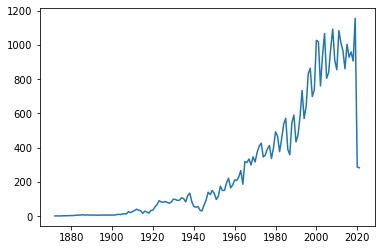

In [14]:
results['date_time'].dt.year.value_counts().sort_index().plot()

## Filtering the time-series for more fine grained detail

It would also be insightful to take a look at a narrower range of International matches. 

Create a boolean Series from the `date_time` column.

In [15]:
results['date_time'].dt.year >= 2014

0        False
1        False
2        False
3        False
4        False
         ...  
42178     True
42179     True
42180     True
42181     True
42182     True
Name: date_time, Length: 42183, dtype: bool

Slice the Series and only keep rows that are `True`.

In [16]:
results['date_time'].dt.year[results['date_time'].dt.year >= 2014]

35806    2014
35807    2014
35808    2014
35809    2014
35810    2014
         ... 
42178    2021
42179    2021
42180    2021
42181    2021
42182    2021
Name: date_time, Length: 6377, dtype: int64

As previously, use Pandas `value_counts()` to count the occurances each year.

In [17]:
results['date_time'].dt.year[results['date_time'].dt.year >= 2014].value_counts()

2019    1155
2015    1003
2017     958
2016     928
2018     905
2014     860
2020     286
2021     282
Name: date_time, dtype: int64

Then sort it by the index using Pandas `sort_index()`.

In [18]:
results['date_time'].dt.year[results['date_time'].dt.year >= 2014].value_counts().sort_index()

2014     860
2015    1003
2016     928
2017     958
2018     905
2019    1155
2020     286
2021     282
Name: date_time, dtype: int64

Now using Pandas `plot()` to visualise the Series.

<AxesSubplot:>

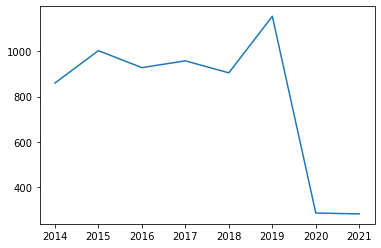

In [19]:
results['date_time'].dt.year[results['date_time'].dt.year >= 2014].value_counts().sort_index().plot()

There is a large drop in the final two years. 2020 is low mainly due to COVID and 2021 is partly COVID and partly an unfinished year. 

We can see this using Pandas `max()` on the `date_time` column.

In [20]:
results['date_time'].max()

Timestamp('2021-06-08 00:00:00')